In [26]:
%pylab inline
plt.style.use("/mnt/home/nico/matplotlib.mplstyle")


import astropy.units as u
import numpy as np
from astropy import constants
# Gala
import gala.potential as gp
from gala.units import galactic

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
def get_potential(log_M_h, log_r_s):
    mw_potential = gp.CCompositePotential()
    mw_potential['bulge'] = gp.HernquistPotential(m=5E9, c=1., units=galactic)
    mw_potential['disk'] = gp.MiyamotoNagaiPotential(m=6.8E10*u.Msun, a=3*u.kpc, b=280*u.pc,
                                                     units=galactic)

    mw_potential['halo'] = gp.NFWPotential(m=np.exp(log_M_h), r_s=np.exp(log_r_s), units=galactic)

    return mw_potential

In [41]:
halo1 = get_potential(np.log(1.5E12), np.log(15))
halo2 = get_potential(np.log(1E12), np.log(15))
halo3 = get_potential(np.log(2E12), np.log(15))

In [37]:
G = constants.G

In [38]:
halo1.density([1, 0, 0])

<Quantity [2.89228781e+09] solMass / kpc3>

In [43]:
tdyn1 = np.zeros(100)
tdyn2 = np.zeros(100)
tdyn3 = np.zeros(100)

r = np.linspace(0.1, 300, 100)
for i in range(len(r)):
    t1 = 1 / np.sqrt(halo1.density([r[i], 0, 0]*u.kpc) * G)
    t2 = 1 / np.sqrt(halo2.density([r[i], 0, 0]*u.kpc) * G)
    t3 = 1 / np.sqrt(halo3.density([r[i], 0, 0]*u.kpc) * G)

    tdyn1[i] = t1.to(u.Gyr).value
    tdyn2[i] = t2.to(u.Gyr).value
    tdyn3[i] = t3.to(u.Gyr).value


In [58]:
dth_m12b = 1.5

dth_m12c = 0.3

dth_m12f1 = 0.3
dth_m12f2 = 0.6

dth_m12i = 2

dth_m12m = 1.8

dth_m12r1 = 2
dth_m12r2 = 0.5

dth_m12w1 = 0.8
dth_m12w2 = 3.8

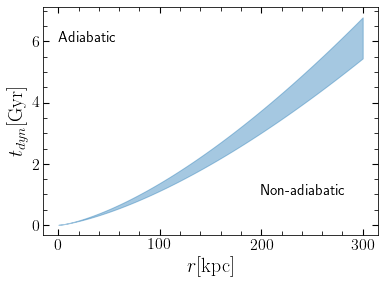

In [64]:
#plt.plot(r, tdyn1)

plt.fill_between(r, tdyn2, tdyn3, color='C0', alpha=0.4)
text(0, 6, 'Adiabatic', fontsize=15)
text(200, 1, 'Non-adiabatic', fontsize=15)

#plt.axhline(dth_m12b, lw=1, c='k', alpha=0.7, ls='--')
#plt.axhline(dth_m12c, lw=1, c='k', alpha=0.7, ls='--')
#plt.axhline(dth_m12f1, lw=1, c='k', alpha=0.7, ls='--')
#plt.axhline(dth_m12f2, lw=1, c='k', alpha=0.7, ls='--')
#plt.axhline(dth_m12m, lw=1, c='k', alpha=0.7, ls='--')
#plt.axhline(dth_m12i, lw=1, c='k', alpha=0.7, ls='--')
#plt.axhline(dth_m12r1, lw=1, c='k', alpha=0.7, ls='--')
#plt.axhline(dth_m12r2, lw=1, c='k', alpha=0.7, ls='--')
#plt.axhline(dth_m12w1, lw=1, c='k', alpha=0.7, ls='--')
#plt.axhline(dth_m12w2, lw=1, c='k', alpha=0.7, ls='--')

xlabel(r'$r \rm{[kpc]}$')
ylabel(r'$t_{dyn} \rm{[Gyr]}$')

plt.savefig('Dynamical_time_MW_halos.png', bbox_inches='tight')
plt.savefig('Dynamical_time_MW_halos.pdf', bbox_inches='tight')